In [55]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

In [56]:
sns.set_context('paper', font_scale=2.5)
sns.set_style('white')


# Import dataset and preprocessing 

In [57]:
os.chdir("../2_Data")
os.getcwd()

'/Users/zhengyuanrui/Decoding_SALT/2_Data'

In [58]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

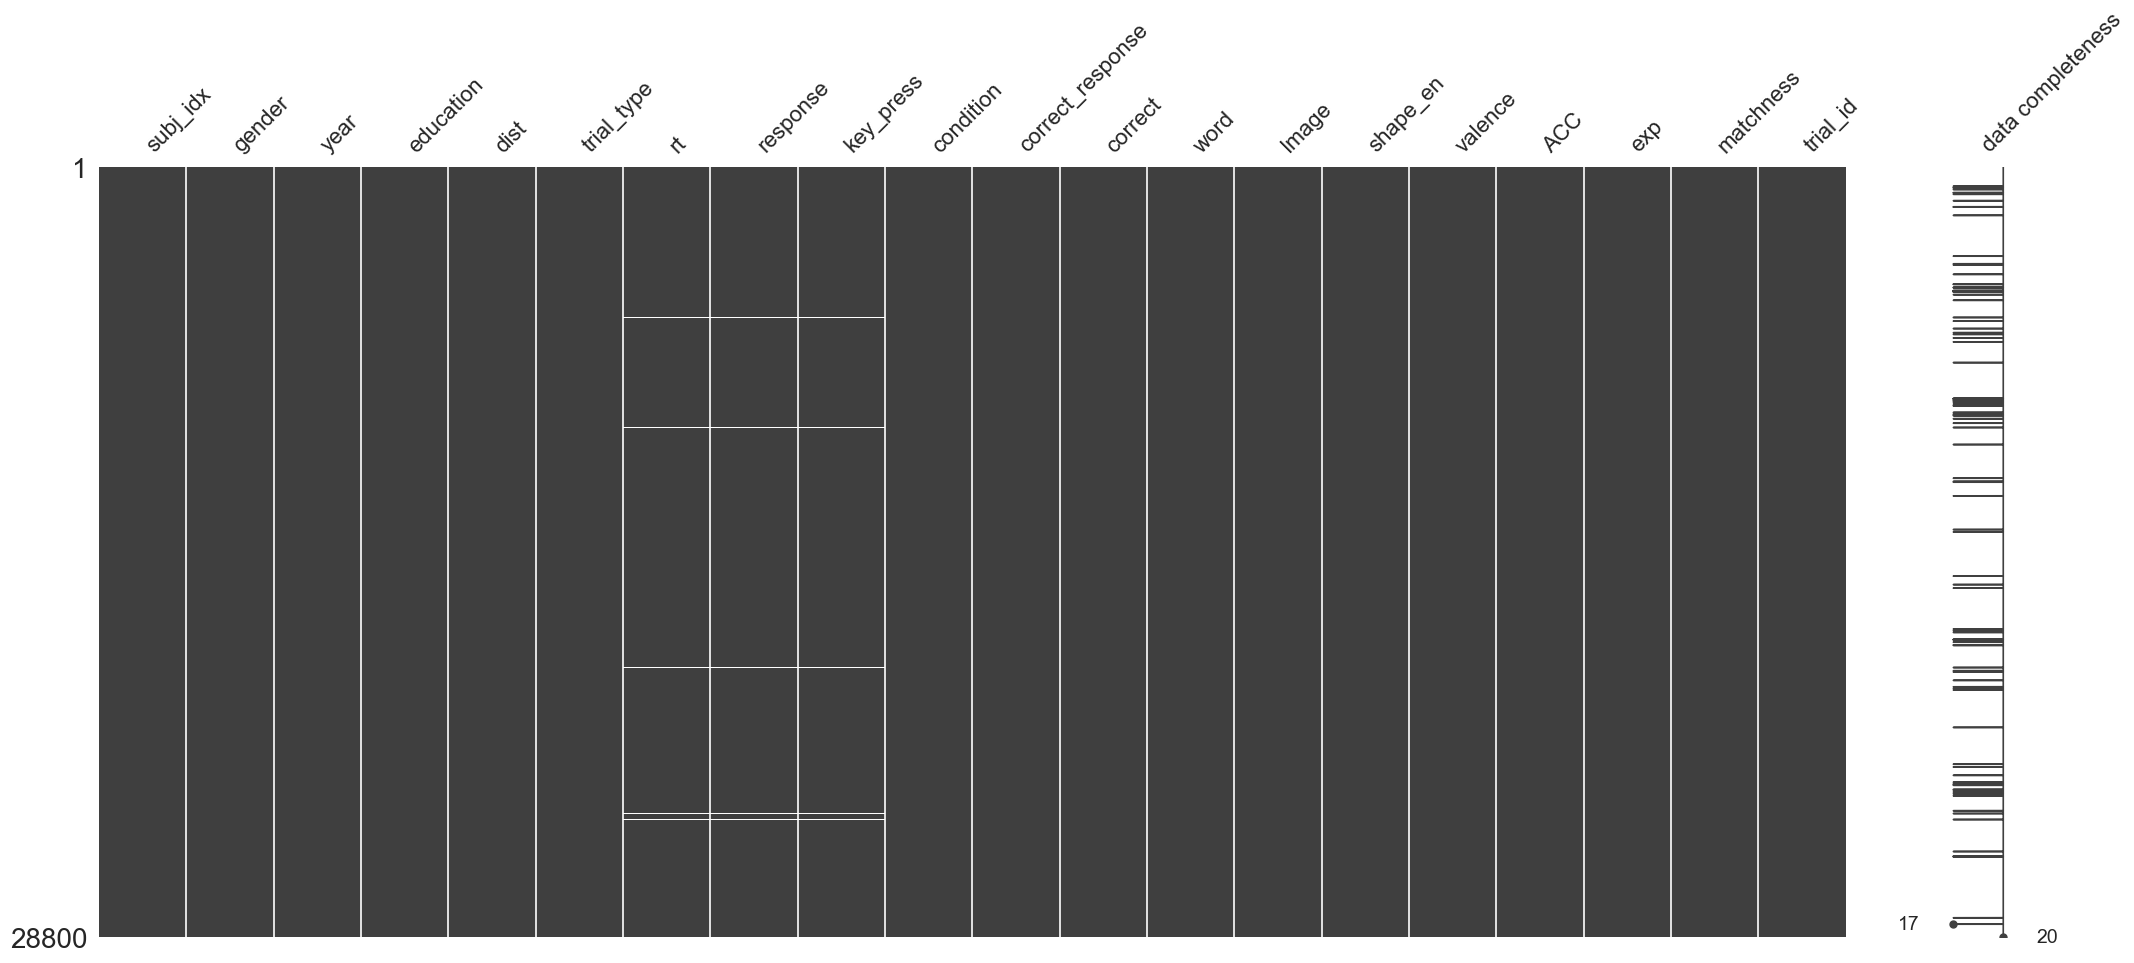

In [60]:
msno.matrix(df1, labels=True)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

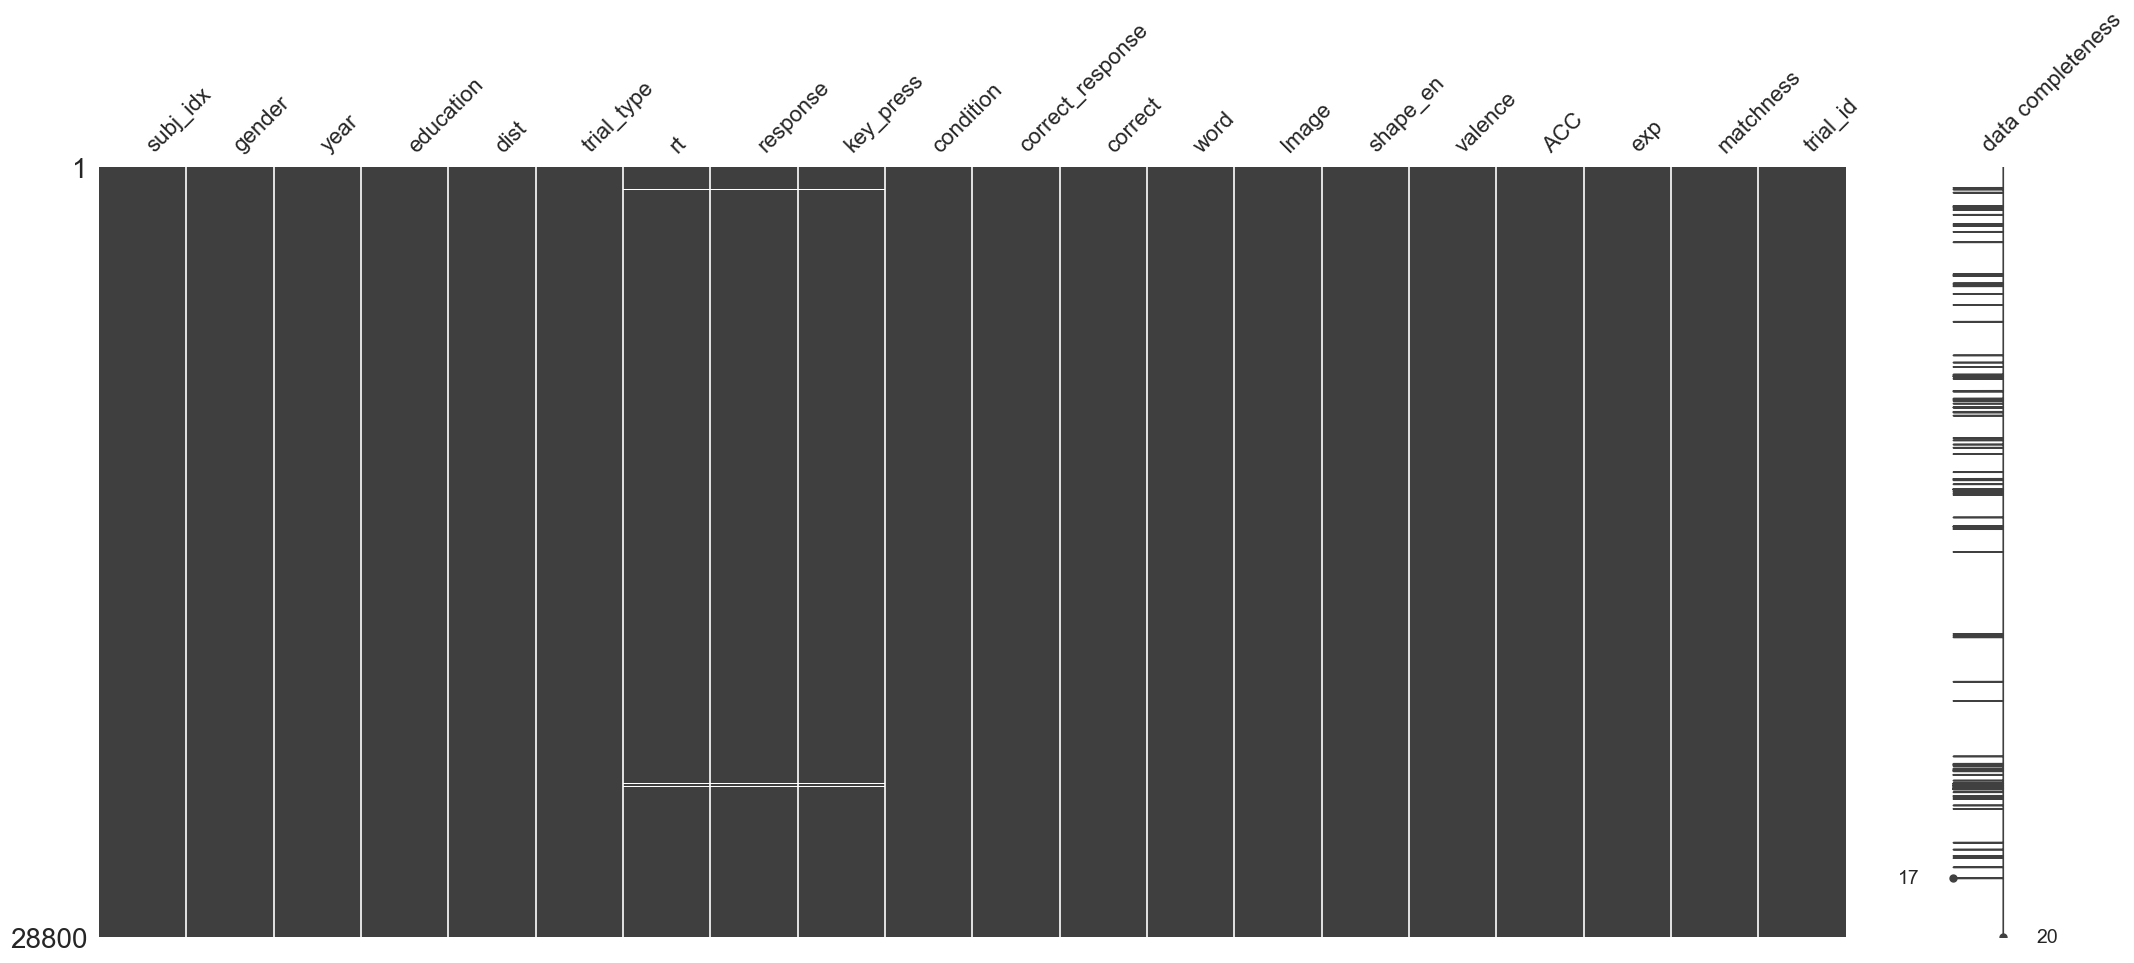

In [62]:
msno.matrix(df2, labels=True)

In [63]:
df1 = df1.dropna()

In [64]:
df1['rt'] = np.log(df1['rt'])

In [65]:
df1['matchness'] = df1['matchness'].map(dict(match=1, mismatch=0))

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [67]:
df2 = df2.dropna()

In [68]:
df2['rt'] = np.log(df2['rt'])

In [69]:
df2['matchness'] = df2['matchness'].map(dict(match=1, mismatch=0))

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Onehot Coding

In [71]:
onehot_v1 = pd.get_dummies(df1[["valence"]])

In [72]:
df1 = pd.concat([df1, onehot_v1], axis=1)

In [73]:
onehot_v2 = pd.get_dummies(df2[["valence"]])

In [74]:
df2 = pd.concat([df2, onehot_v2], axis=1)

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Split the data by condition

In [77]:
df1_sim = df1[df1.condition == "simultaneous"]
df1_word = df1[df1.condition == "word_first"]
df1_img = df1[df1.condition == "image_first"]

df2_sim = df2[df2.condition == "simultaneous"]
df2_word = df2[df2.condition == "word_first"]
df2_img = df2[df2.condition == "image_first"]

In [78]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values

y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

In [79]:
X1_sim = df1_sim[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_word = df1_word[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_img = df1_img[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values

X2_sim = df2_sim[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_word = df2_word[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_img = df2_img[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values

# within sub, cross condition

## Exp1

In [80]:
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values

### Image_first as source

In [81]:
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [82]:
df_result_si

,sub,score,fold,source,target
0,1,0.736979,0,Image_first,Image_first
1,1,0.596354,1,Image_first,Image_first
2,1,0.723958,2,Image_first,Image_first
3,1,0.634549,3,Image_first,Image_first
4,1,0.558160,4,Image_first,Image_first
...,...,...,...,...,...
35995,40,0.450313,297,Image_first,Simultaneous
35996,40,0.442778,298,Image_first,Word_first
35997,40,0.451910,298,Image_first,Simultaneous
35998,40,0.412708,299,Image_first,Word_first


### Word_first as source

In [83]:
df_result_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Simultaneous")
        
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_i)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Image_first")

df_result_sw=pd.DataFrame(df_result_sw) 

In [84]:
df_result_sw

,sub,score,fold,source,target
0,1,0.603299,0,Word_first,Word_first
1,1,0.631076,1,Word_first,Word_first
2,1,0.662326,2,Word_first,Word_first
3,1,0.645833,3,Word_first,Word_first
4,1,0.713542,4,Word_first,Word_first
...,...,...,...,...,...
35995,40,0.511181,297,Word_first,Image_first
35996,40,0.523715,298,Word_first,Simultaneous
35997,40,0.524826,298,Word_first,Image_first
35998,40,0.535660,299,Word_first,Simultaneous


### Simultaneous as source

In [85]:
df_result_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(s)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_i)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Image_first")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_w)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Word_first")

df_result_ss=pd.DataFrame(df_result_ss) 

In [86]:
df_result1_rf = pd.concat([df_result_ss, df_result_si, df_result_sw])
df_result1_rf.to_csv('result1_cross_con_RF.csv')

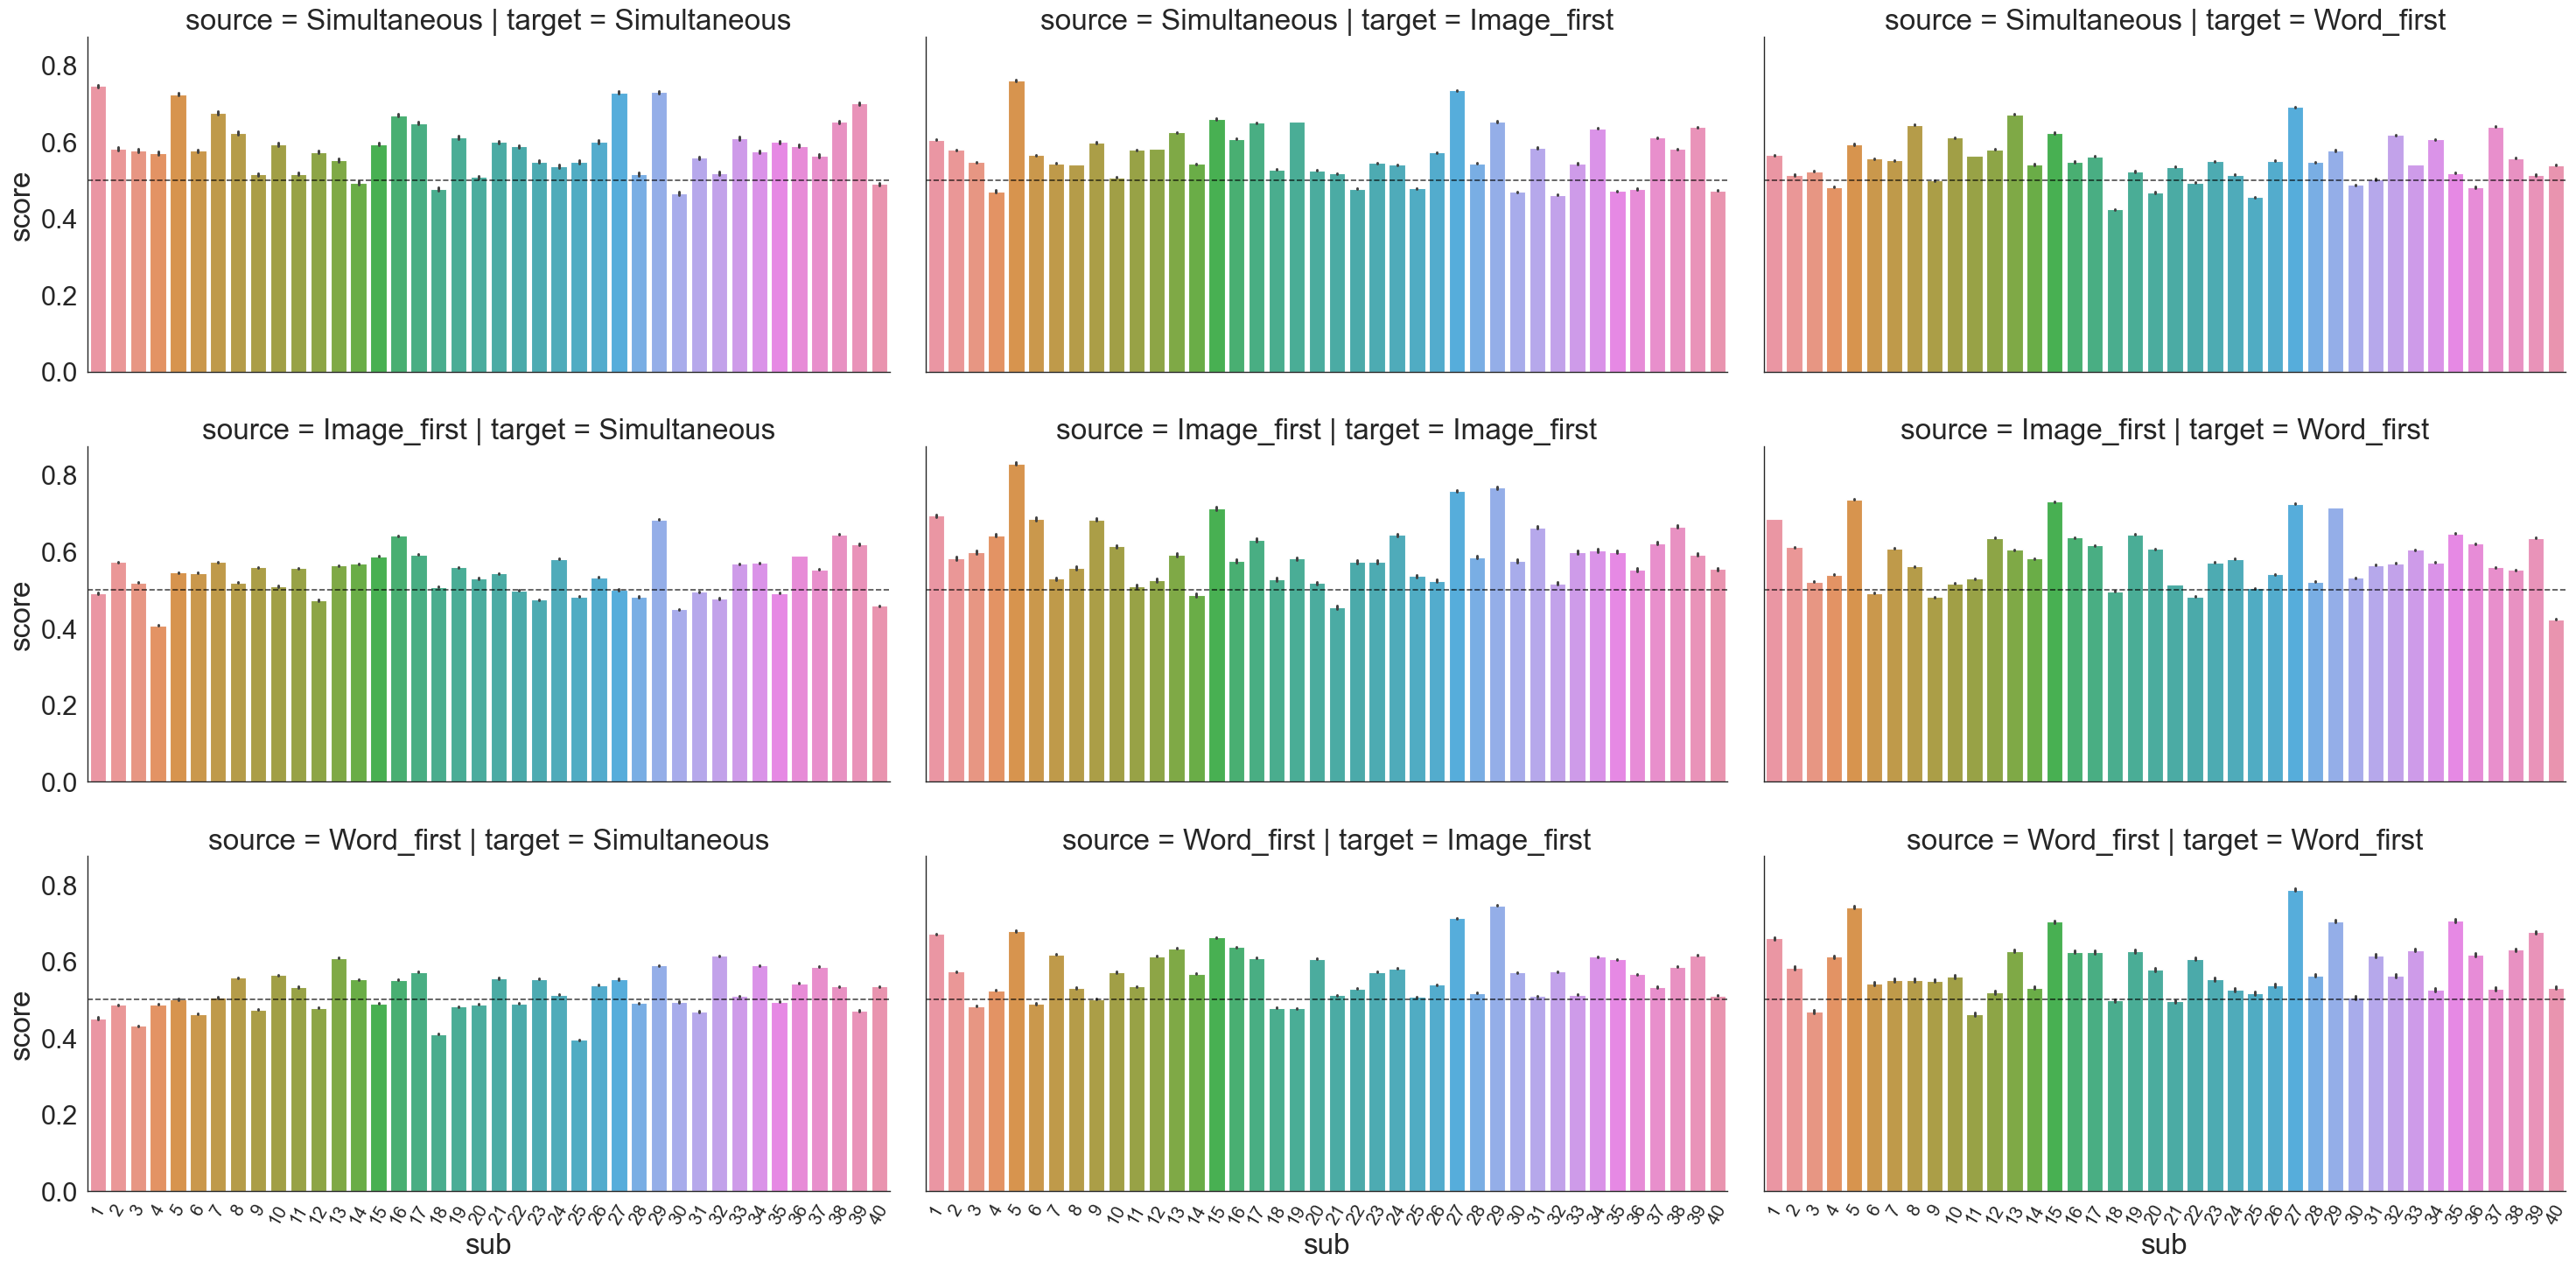

In [87]:
r1_rf = sns.catplot(x="sub", y="score", data=df_result1_rf, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r1_rf.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r1_rf.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r1_rf.axes.flatten()]
plt.savefig("barplot_cro_con_rf.png",dpi=300)

## Exp2

In [88]:
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values

### Image_first as source

In [89]:
df_result2_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_w)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Word_first")
        
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Simultaneous")

df_result2_si=pd.DataFrame(df_result2_si)  

In [90]:
df_result2_si

,sub,score,fold,source,target
0,1,0.716146,0,Image_first,Image_first
1,1,0.689236,1,Image_first,Image_first
2,1,0.717014,2,Image_first,Image_first
3,1,0.708333,3,Image_first,Image_first
4,1,0.678819,4,Image_first,Image_first
...,...,...,...,...,...
35995,40,0.529271,297,Image_first,Simultaneous
35996,40,0.516250,298,Image_first,Word_first
35997,40,0.541979,298,Image_first,Simultaneous
35998,40,0.541111,299,Image_first,Word_first


### Word_first as source

In [91]:
df_result2_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Simultaneous")
        
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_i)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Image_first")

df_result2_sw=pd.DataFrame(df_result2_sw) 

In [92]:
df_result2_sw

,sub,score,fold,source,target
0,1,0.718750,0,Word_first,Word_first
1,1,0.672743,1,Word_first,Word_first
2,1,0.717882,2,Word_first,Word_first
3,1,0.798611,3,Word_first,Word_first
4,1,0.798611,4,Word_first,Word_first
...,...,...,...,...,...
35995,40,0.540590,297,Word_first,Image_first
35996,40,0.456875,298,Word_first,Simultaneous
35997,40,0.522257,298,Word_first,Image_first
35998,40,0.461285,299,Word_first,Simultaneous


### Simultaneous as source

In [93]:
df_result2_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(s)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_i)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Image_first")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_w)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Word_first")

df_result2_ss=pd.DataFrame(df_result2_ss) 

In [94]:
df_result2_ss

,sub,score,fold,source,target
0,1,0.798611,0,Simultaneous,Simultaneous
1,1,0.775174,1,Simultaneous,Simultaneous
2,1,0.757813,2,Simultaneous,Simultaneous
3,1,0.745660,3,Simultaneous,Simultaneous
4,1,0.710938,4,Simultaneous,Simultaneous
...,...,...,...,...,...
35995,40,0.484132,297,Simultaneous,Word_first
35996,40,0.585729,298,Simultaneous,Image_first
35997,40,0.469340,298,Simultaneous,Word_first
35998,40,0.586250,299,Simultaneous,Image_first


In [95]:
df_result2_rf = pd.concat([df_result2_si, df_result2_ss, df_result2_sw])

In [96]:
df_result2_rf.to_csv('result2_cross_con_RF.csv')

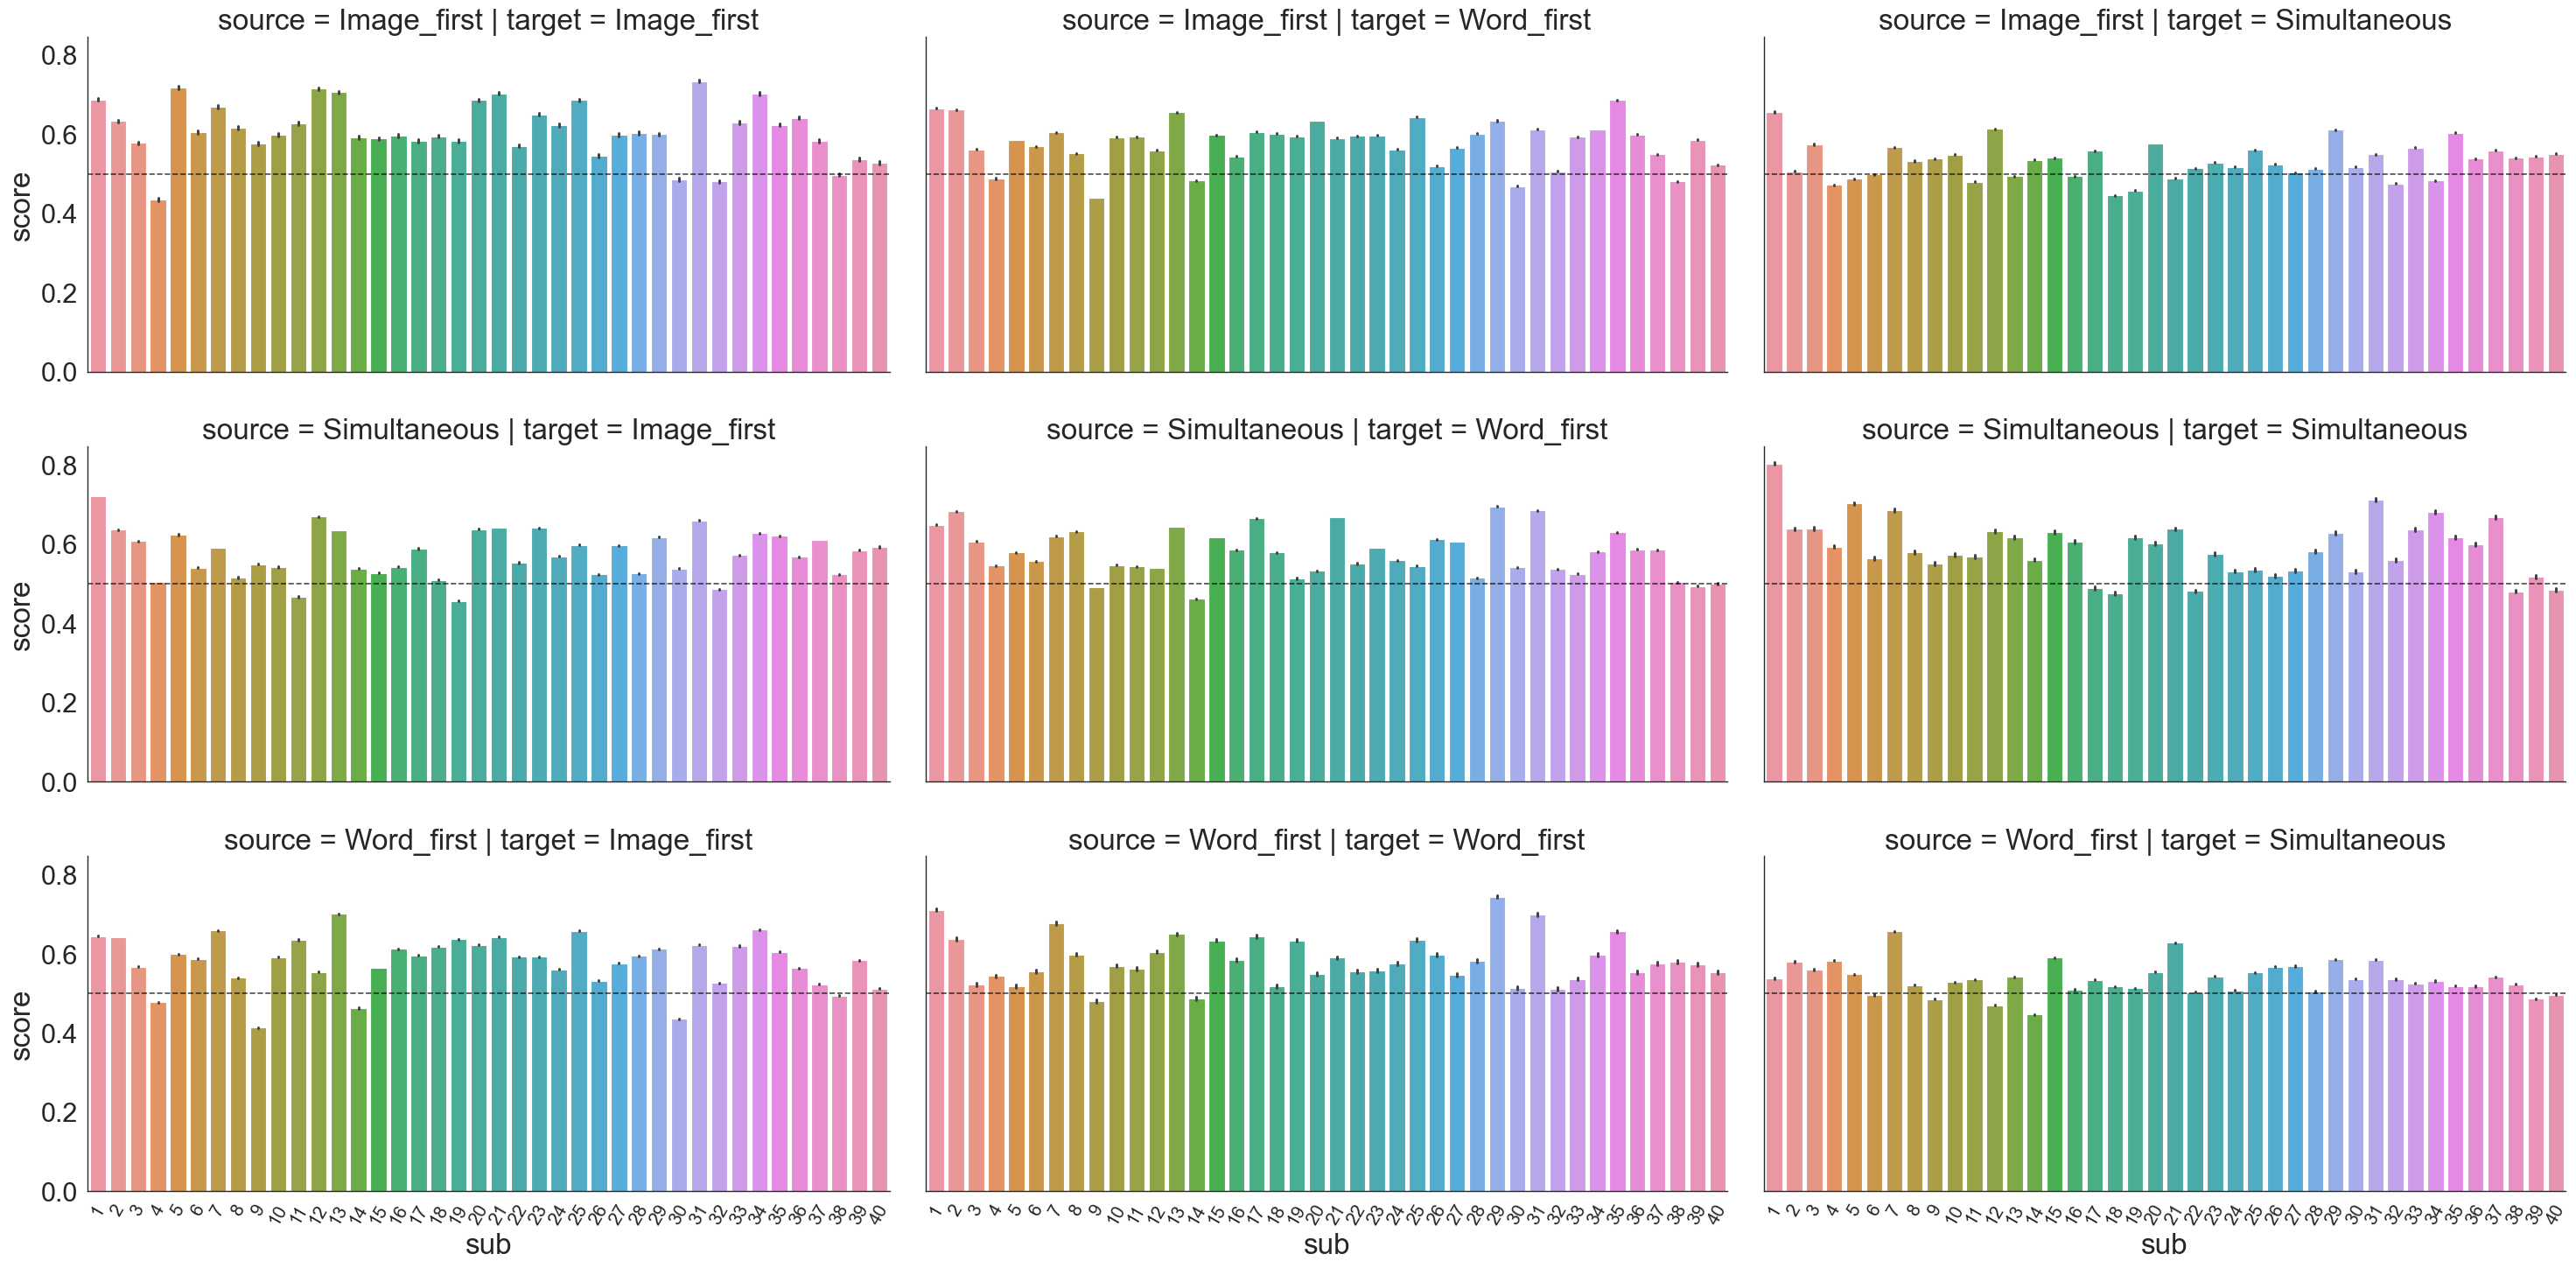

In [97]:
r2_rf = sns.catplot(x="sub", y="score", data=df_result2_rf, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r2_rf.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r2_rf.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r2_rf.axes.flatten()]
plt.savefig("barplot_cro_con2_rf.png",dpi=300)

# within sub, cross condition and cross experiment

## simultaneous as source, exp1 → exp2

In [98]:
groups1_sim = df1_sim["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [99]:
df_croexp12_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_i)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Image_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_w)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Word_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_s)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Simultaneous")
        df_croexp12_ss["experiment"].append("exp1 → exp2")


df_croexp12_ss=pd.DataFrame(df_croexp12_ss) 

In [100]:
df_croexp12_ss

,sub,score,fold,source,target,experiment
0,1,0.717153,0,Simultaneous,Image_first,exp1 → exp2
1,1,0.656528,0,Simultaneous,Word_first,exp1 → exp2
2,1,0.738090,0,Simultaneous,Simultaneous,exp1 → exp2
3,1,0.705903,1,Simultaneous,Image_first,exp1 → exp2
4,1,0.635139,1,Simultaneous,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.505799,298,Simultaneous,Word_first,exp1 → exp2
35996,40,0.499444,298,Simultaneous,Simultaneous,exp1 → exp2
35997,40,0.476736,299,Simultaneous,Image_first,exp1 → exp2
35998,40,0.499896,299,Simultaneous,Word_first,exp1 → exp2


### Word_first as source, exp1 → exp2

In [101]:
groups1_word = df1_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [102]:
df_croexp12_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_i)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Image_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_w)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Word_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_s)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Simultaneous")
        df_croexp12_sw["experiment"].append("exp1 → exp2")


df_croexp12_sw=pd.DataFrame(df_croexp12_sw) 

In [103]:
df_croexp12_sw

,sub,score,fold,source,target,experiment
0,1,0.603125,0,Word_first,Image_first,exp1 → exp2
1,1,0.641354,0,Word_first,Word_first,exp1 → exp2
2,1,0.568576,0,Word_first,Simultaneous,exp1 → exp2
3,1,0.603958,1,Word_first,Image_first,exp1 → exp2
4,1,0.686181,1,Word_first,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.543958,298,Word_first,Word_first,exp1 → exp2
35996,40,0.523958,298,Word_first,Simultaneous,exp1 → exp2
35997,40,0.567708,299,Word_first,Image_first,exp1 → exp2
35998,40,0.537500,299,Word_first,Word_first,exp1 → exp2


### Image_first as source, exp1 → exp2

In [104]:
groups1_img = df1_img["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [105]:
df_croexp12_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_i)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Image_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_w)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Word_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_s)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Simultaneous")
        df_croexp12_si["experiment"].append("exp1 → exp2")


df_croexp12_si=pd.DataFrame(df_croexp12_si) 

In [106]:
df_croexp12_si

,sub,score,fold,source,target,experiment
0,1,0.647917,0,Image_first,Image_first,exp1 → exp2
1,1,0.745382,0,Image_first,Word_first,exp1 → exp2
2,1,0.510764,0,Image_first,Simultaneous,exp1 → exp2
3,1,0.611007,1,Image_first,Image_first,exp1 → exp2
4,1,0.719896,1,Image_first,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.484931,298,Image_first,Word_first,exp1 → exp2
35996,40,0.489306,298,Image_first,Simultaneous,exp1 → exp2
35997,40,0.466111,299,Image_first,Image_first,exp1 → exp2
35998,40,0.490590,299,Image_first,Word_first,exp1 → exp2


### Simultaneous as source, exp2 → exp1

In [107]:
groups2_sim = df2_sim["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [108]:
df_croexp21_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_i)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Image_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_w)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Word_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_s)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Simultaneous")
        df_croexp21_ss["experiment"].append("exp2 → exp1")


df_croexp21_ss=pd.DataFrame(df_croexp21_ss) 

In [109]:
df_croexp21_ss

,sub,score,fold,source,target,experiment
0,1,0.614479,0,Simultaneous,Image_first,exp2 → exp1
1,1,0.573333,0,Simultaneous,Word_first,exp2 → exp1
2,1,0.762674,0,Simultaneous,Simultaneous,exp2 → exp1
3,1,0.590035,1,Simultaneous,Image_first,exp2 → exp1
4,1,0.568924,1,Simultaneous,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.554097,298,Simultaneous,Word_first,exp2 → exp1
35996,40,0.512778,298,Simultaneous,Simultaneous,exp2 → exp1
35997,40,0.553333,299,Simultaneous,Image_first,exp2 → exp1
35998,40,0.518438,299,Simultaneous,Word_first,exp2 → exp1


### Word_first as source, exp2 → exp1

In [110]:
groups2_word = df2_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [111]:
df_croexp21_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_i)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Image_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_w)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Word_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_s)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Simultaneous")
        df_croexp21_sw["experiment"].append("exp2 → exp1")


df_croexp21_sw=pd.DataFrame(df_croexp21_sw) 

In [112]:
df_croexp21_sw

,sub,score,fold,source,target,experiment
0,1,0.678750,0,Word_first,Image_first,exp2 → exp1
1,1,0.760556,0,Word_first,Word_first,exp2 → exp1
2,1,0.539340,0,Word_first,Simultaneous,exp2 → exp1
3,1,0.699514,1,Word_first,Image_first,exp2 → exp1
4,1,0.721354,1,Word_first,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.542847,298,Word_first,Word_first,exp2 → exp1
35996,40,0.513125,298,Word_first,Simultaneous,exp2 → exp1
35997,40,0.486632,299,Word_first,Image_first,exp2 → exp1
35998,40,0.505729,299,Word_first,Word_first,exp2 → exp1


### Image_first as source, exp2 → exp1

In [113]:
groups2_img = df2_img["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [114]:
df_croexp21_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_i)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Image_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_w)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Word_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_s)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Simultaneous")
        df_croexp21_si["experiment"].append("exp2 → exp1")


df_croexp21_si=pd.DataFrame(df_croexp21_si) 

In [115]:
df_croexp21_si

,sub,score,fold,source,target,experiment
0,1,0.686007,0,Image_first,Image_first,exp2 → exp1
1,1,0.722500,0,Image_first,Word_first,exp2 → exp1
2,1,0.613125,0,Image_first,Simultaneous,exp2 → exp1
3,1,0.656146,1,Image_first,Image_first,exp2 → exp1
4,1,0.684826,1,Image_first,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.463507,298,Image_first,Word_first,exp2 → exp1
35996,40,0.482986,298,Image_first,Simultaneous,exp2 → exp1
35997,40,0.494792,299,Image_first,Image_first,exp2 → exp1
35998,40,0.493542,299,Image_first,Word_first,exp2 → exp1


In [116]:
df_cro_rf = pd.concat([df_croexp12_si, df_croexp12_ss, df_croexp12_sw, df_croexp21_si, df_croexp21_ss, df_croexp21_sw])

In [117]:
df_cro_rf.to_csv("Cross_Exp_RF.csv")

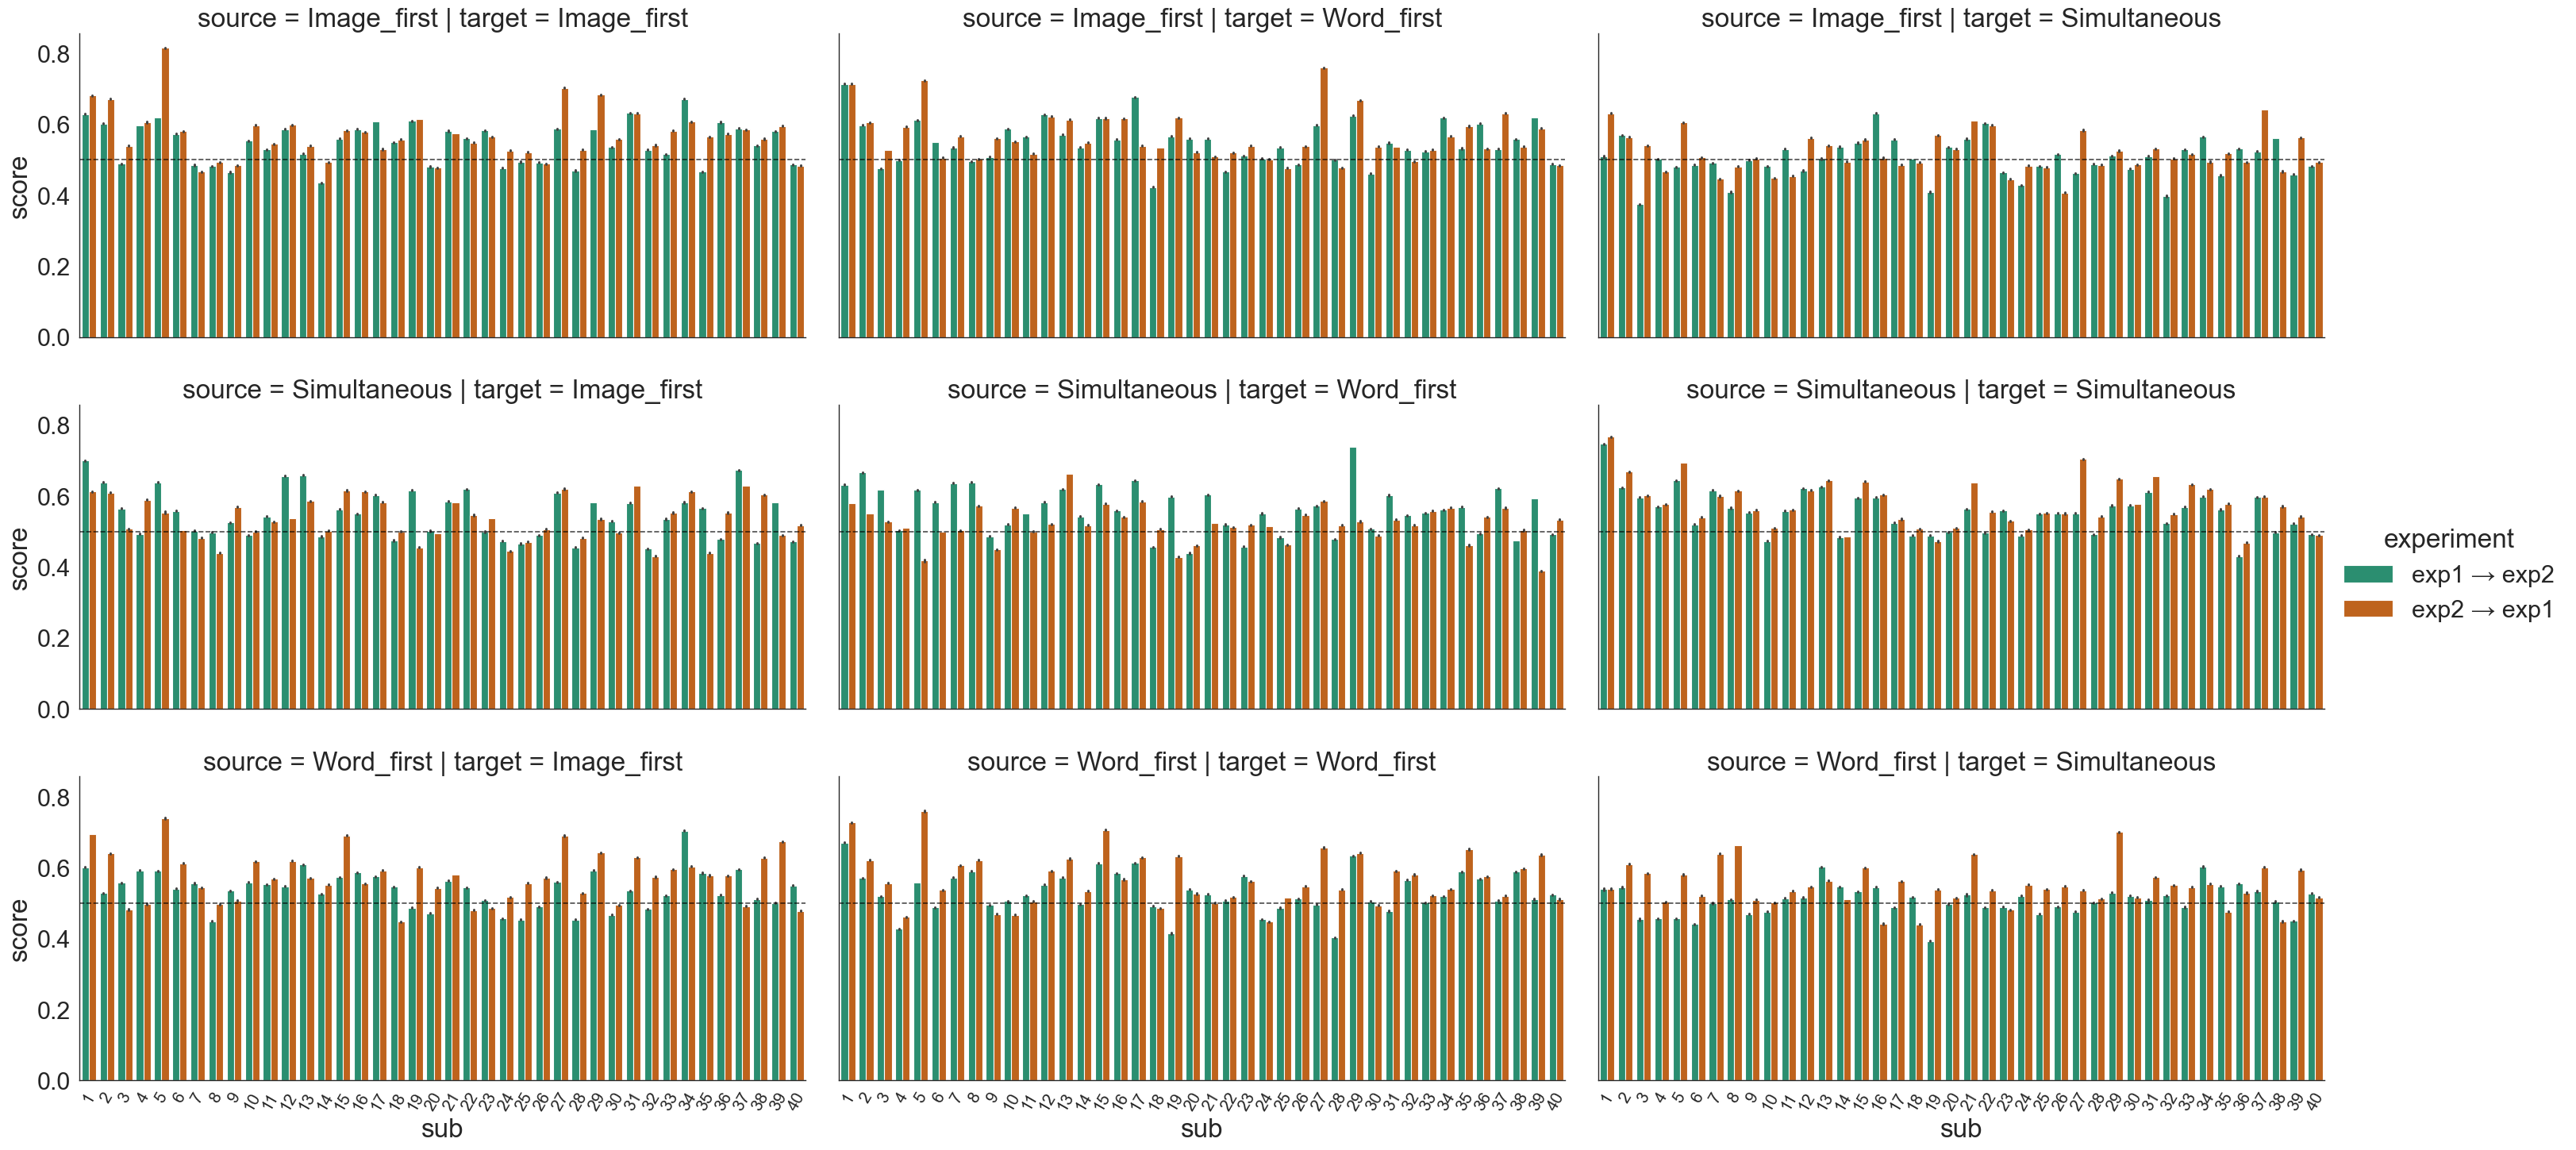

In [118]:
f_cro_rf = sns.catplot(x="sub", y="score", data=df_cro_rf, row="source", col="target", aspect=2, kind="bar", hue="experiment", errorbar="se", palette=sns.color_palette("Dark2"))
xtick_order = list(f_cro_rf.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in f_cro_rf.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in f_cro_rf.axes.flatten()]
plt.savefig("barplot_cro_exp_rf.png",dpi=300)